# Import

In [1]:
# !pip install --upgrade scikit-learn

In [1]:
import pandas as pd
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Example

In [46]:
# Get labeled data
data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data['data']
y = data['target']

In [49]:
y

array([10,  3, 17, ...,  3,  1,  7])

In [47]:
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

2024-04-26 12:46:59,912 - BERTopic - Transformed documents to Embeddings
2024-04-26 12:46:59,913 - BERTopic - The dimensionality reduction algorithm did not contain the `y` parameter and therefore the `y` parameter was not used
2024-04-26 12:46:59,914 - BERTopic - Reduced dimensionality
2024-04-26 12:47:03,247 - BERTopic - Clustered reduced embeddings


In [51]:
mappings = topic_model.topic_mapper_.get_mappings()
mappings = {value: data["target_names"][key] for key, value in mappings.items()}

# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Class
0,0,999,0_game_hockey_team_25,rec.sport.hockey
1,1,997,1_god_church_jesus_christ,soc.religion.christian
2,2,996,2_bike_dod_ride_bikes,rec.motorcycles
3,3,994,3_baseball_game_he_year,rec.sport.baseball
4,4,991,4_key_encryption_db_clipper,sci.crypt
5,5,990,5_car_cars_engine_ford,rec.autos
6,6,990,6_medical_patients_cancer_disease,sci.med
7,7,988,7_window_server_widget_motif,comp.windows.x
8,8,987,8_space_launch_nasa_orbit,sci.space
9,9,985,9_maxaxaxaxaxaxaxaxaxaxaxaxaxaxax_windows_dos_...,comp.os.ms-windows.misc


# Data

In [54]:
rawdata_test = pd.read_csv('../datasets/sBERTopic/test.csv', encoding='utf-8')
rawdata_test

,Order,text,final_topic,topics,label
0,2,It is a universe filled with countless planets...,Engaging_1,Engaging,17
1,3,It's a fantastic game and I would recommend to...,Recommendation_5,Recommendation,48
2,4,Fighting on- and off planet is as exciting as ...,Combat mechanics_1,Combat mechanics,6
3,4,Everything is autopiloted- Feels more casual t...,Movement mechanics_4,Movement mechanics,34
4,6,Be patient and follow the storyline as,Narrative_4,Narrative,35
...,...,...,...,...,...
947,1792,when a shooting actually occurs in a dance cl...,ImmersionRealism_5,ImmersionRealism,25
948,1793,the same snarky humor and I can easily lose tr...,Engaging_5,Engaging,17
949,1794,this is an awesome remake.,GameEvaluation_5,GameEvaluation,21
950,1795,There's an ok amount of customization for the ...,Customisation_4,Customisation,12


# Evaluation

In [11]:
train=rawdata.sample(frac=0.7,random_state=2000)
test=rawdata.drop(train.index)

In [12]:
train

,Order,text,final_topic,topics,Number
1249,723,a classic tycoon-style game with wacky and irr...,GameEvaluation_4,GameEvaluation,21
72,41,but honestly find the ones with the challenges...,DifficultyBalance_4,DifficultyBalance,15
969,565,however some of them get too repetitive like f...,Narrative_2,Narrative,35
2568,1454,That was all I needed to see to know that I'm ...,GameEvaluation_5,GameEvaluation,21
2432,1377,This game is way to good to pass up especially...,Virtual reality headset_5,Virtual reality headset,60
...,...,...,...,...,...
1185,682,Surviving Edged Weapons taught me a lot of val...,ImmersionRealism_5,ImmersionRealism,25
2845,1611,Steam refund simulator 2016 10/10 would refund...,Refund_2,Refund,49
227,130,I would LOVE to see more aesthetic customizati...,Customisation_5,Customisation,12
2909,1647,does mess up the game for others as everythin...,InteractionSocialisation_2,InteractionSocialisation,28


In [13]:
test

,Order,text,final_topic,topics,Number
1,2,It is a universe filled with countless planets...,Engaging_1,Engaging,17
3,3,It's a fantastic game and I would recommend to...,Recommendation_5,Recommendation,48
4,4,Fighting on- and off planet is as exciting as ...,Combat mechanics_1,Combat mechanics,6
6,4,Everything is autopiloted- Feels more casual t...,Movement mechanics_4,Movement mechanics,34
9,6,Be patient and follow the storyline as,Narrative_4,Narrative,35
...,...,...,...,...,...
3158,1792,when a shooting actually occurs in a dance cl...,ImmersionRealism_5,ImmersionRealism,25
3160,1793,the same snarky humor and I can easily lose tr...,Engaging_5,Engaging,17
3163,1794,this is an awesome remake.,GameEvaluation_5,GameEvaluation,21
3165,1795,There's an ok amount of customization for the ...,Customisation_4,Customisation,12


<Axes: ylabel='topics'>

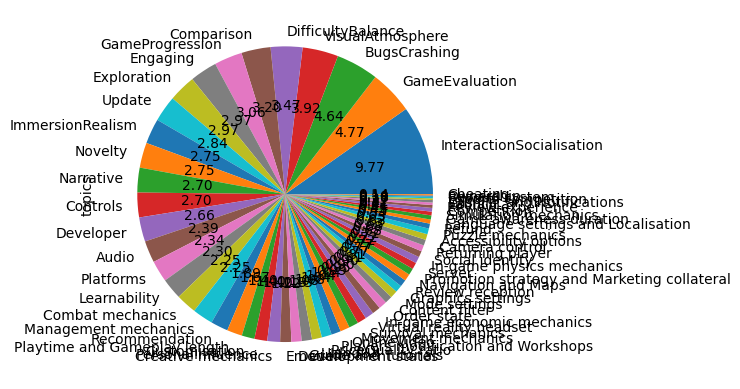

In [14]:
train.topics.value_counts().plot(kind = 'pie', autopct="%.2f")

<Axes: ylabel='topics'>

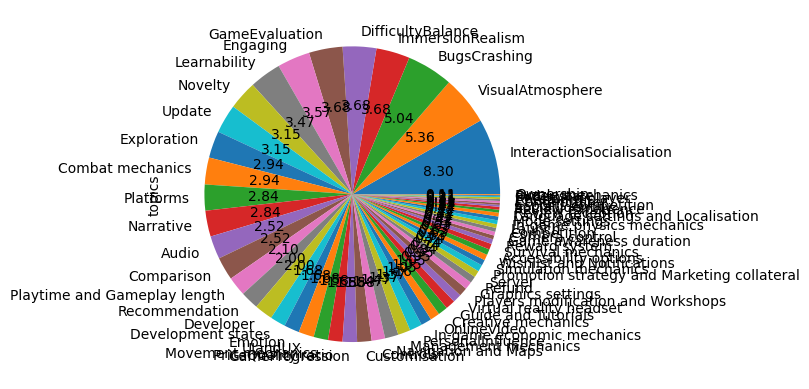

In [15]:
test.topics.value_counts().plot(kind = 'pie', autopct="%.2f")

In [9]:
train.to_csv('../datasets/sBERTopic/train.csv',index=False)
test.to_csv('../datasets/sBERTopic/test.csv',index=False)

# Train

In [3]:
rawdata = pd.read_csv('../datasets/sBERTopic/1105results/train_filter.csv', encoding='utf-8')
rawdata

,Order,text,final_topic,topics,label
0,610,I was just wondering if you guys could just pu...,Accessibility options_2,Accessibility options,1
1,782,But I can't play it anymore: the full-screen w...,Accessibility options_1,Accessibility options,1
2,34,"Otherwise liked a lot of the premise, would c...",Accessibility options_2,Accessibility options,1
3,1122,I guess you guys don not care about deaf or ha...,Accessibility options_1,Accessibility options,1
4,81,the colour schemes for stars and economies ar...,Accessibility options_1,Accessibility options,1
...,...,...,...,...,...
2164,577,"Graphics are super nice, and",VisualAtmosphere_5,VisualAtmosphere,61
2165,323,you’ll find yourself in camera mode every 5min...,VisualAtmosphere_5,VisualAtmosphere,61
2166,697,"had my reservations, but it is actually pretty...",VisualAtmosphere_5,VisualAtmosphere,61
2167,36,"Graphics are good, some screen tearing, but th...",VisualAtmosphere_4,VisualAtmosphere,61


## count

In [56]:
value_counts = rawdata['topics'].value_counts()
print(value_counts)

InteractionSocialisation      217
GameEvaluation                106
BugsCrashing                  103
VisualAtmosphere               87
DifficultyBalance              77
                             ... 
Wishlist and Notifications      6
Esports competition             4
Reward system                   4
Ownership                       3
Cheating                        3
Name: topics, Length: 62, dtype: int64


In [63]:
value_counts = pd.DataFrame(value_counts)
value_counts.to_csv('../datasets/sBERTopic/1105results/train-value_counts.csv',header=True)

## train

In [4]:
docs=rawdata['text']
y = rawdata["label"]
y_names = rawdata["topics"]

In [5]:
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

In [6]:
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "content":rawdata['text'],
                          "labels":rawdata["topics"],
                          "Topic": topics})


documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# documents.to_csv('../datasets/sBERTopic/train-BERTopic_reflect2.csv',index=False)

In [7]:
# Map input `y` to topics
mappings = topic_model.topic_mapper_.get_mappings()
mappings = {value: rawdata["label"][key] for key, value in mappings.items()}

In [8]:
# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Class
0,0,217,0_ai_friends_multiplayer_npcs,2
1,1,106,1_overall_shooter_best_tactical,2
2,2,103,2_bugs_crashes_save_performance,1
3,3,87,3_graphics_photo_visuals_visually,2
4,4,77,4_difficulty_difficult_easy_challenging,2
5,5,71,5_theme_hospital_rainbow_subnautica,1
6,6,68,6_progression_unlock_unlocks_unlocked,2
7,7,66,7_waiting_absorbed_oh_empty,2
8,8,66,8_exploration_explore_planets_exploring,2
9,9,63,9_update_updates_content_dlc,2


In [9]:
df.to_csv('../datasets/sBERTopic/1105results/train-BERTopi53.csv',index=False)

In [11]:
df = pd.read_csv('../datasets/sBERTopic/1105results/train-BERTopi53.csv', encoding='utf-8')
df

,Topic,Count,Name,Class
0,0,217,0_ai_friends_multiplayer_npcs,InteractionSocialisation
1,1,106,1_overall_shooter_best_tactical,GameEvaluation
2,2,103,2_bugs_crashes_save_performance,BugsCrashing
3,3,87,3_graphics_photo_visuals_visually,VisualAtmosphere
4,4,77,4_difficulty_difficult_easy_challenging,DifficultyBalance
5,5,71,5_theme_hospital_rainbow_subnautica,Comparison
6,6,68,6_progression_unlock_unlocks_unlocked,GameProgression
7,7,66,7_waiting_absorbed_oh_empty,Engaging
8,8,66,8_exploration_explore_planets_exploring,Exploration
9,9,63,9_update_updates_content_dlc,Update


# Prediction for text

In [12]:
similar_topics, similarity = topic_model.find_topics("No Man's Sky is a truly open universe.", top_n=5)

In [13]:
similar_topics

[8, 43, 24, 11, 5]

In [16]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0])) 

Most Similar Topic Info: 
[('exploration', 0.3681731486465455), ('explore', 0.3255089666370196), ('planets', 0.3094494580198067), ('exploring', 0.27894134661742065), ('discover', 0.2742351637049796), ('universe', 0.2633372530500757), ('tucked', 0.24613062862107254), ('possibilities', 0.24613062862107254), ('discovery', 0.2417195098277501), ('space', 0.2323637572370214)]
Similarity Score: 0.2896302331998462


## Test dataset

In [19]:
test = pd.read_csv('../datasets/sBERTopic/1105results/test_filter.csv', encoding='utf-8')

In [20]:
test

,Order,text,final_topic,topics,label
0,257,it is honestly weird to me that a game from a ...,Accessibility options_1,Accessibility options,1
1,657,but no option/support/inclusion of subtitles a...,Accessibility options_1,Accessibility options,1
2,761,"Like most games, this one doesn't have left ha...",Accessibility options_1,Accessibility options,1
3,851,"in 21st centry, there's yet another game can't...",Accessibility options_1,Accessibility options,1
4,1144,how on earth can a game released in 2018 and s...,Accessibility options_1,Accessibility options,1
...,...,...,...,...,...
914,1613,the game is so outstanding and amazing with co...,VisualAtmosphere_5,VisualAtmosphere,61
915,1671,"The diverse and vibrant environments,",VisualAtmosphere_5,VisualAtmosphere,61
916,1679,"With the addition of photo mode stuff,",VisualAtmosphere_3,VisualAtmosphere,61
917,1694,if you do not already know it is a hospital si...,VisualAtmosphere_5,VisualAtmosphere,61


In [21]:
new_docs=test['text']

In [22]:
topics, probs = topic_model.transform(new_docs)

In [23]:
documents = pd.DataFrame({"Document": new_docs,
                          "Original_topic":test["topics"],
#                           "found_helpful":test["found_helpful"],
#                           "found_funny":test["found_funny"],
#                           "recommend":test["recommend"],
                          "Topic": topics})

In [24]:
# Preprocess Documents

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

In [25]:
documents

,Document,Original_topic,Topic
0,it is honestly weird to me that a game from a ...,Accessibility options,14
1,but no option/support/inclusion of subtitles a...,Accessibility options,15
2,"Like most games, this one doesn't have left ha...",Accessibility options,13
3,"in 21st centry, there's yet another game can't...",Accessibility options,13
4,how on earth can a game released in 2018 and s...,Accessibility options,9
...,...,...,...
914,the game is so outstanding and amazing with co...,VisualAtmosphere,1
915,"The diverse and vibrant environments,",VisualAtmosphere,3
916,"With the addition of photo mode stuff,",VisualAtmosphere,3
917,if you do not already know it is a hospital si...,VisualAtmosphere,1


In [26]:
documents.to_csv('../datasets/sBERTopic/1105results/test-BERTopic_reflect.csv',index=False)

## replace class

In [27]:
Labels={
0: "InteractionSocialisation",
1: "GameEvaluation",
2: "BugsCrashing",
3: "VisualAtmosphere",
4: "DifficultyBalance",
5: "Comparison",
6: "GameProgression",
7: "Engaging",
8: "Exploration",
9: "Update",
10: "ImmersionRealism",
11: "Novelty",
12: "Narrative",
13: "Controls",
14: "Developer",
15: "Audio",
16: "Platforms",
17: "Learnability",
18: "Combat mechanics",
19: "Management mechanics",

20: "Recommendation",
21: "Playtime and Gameplay length",
22: "PersonalInfluence",

23: "Customisation",
24: "Creative mechanics",
25: "Emotion",
26: "Development states",

27: "Guide and Tutorials",
28: "UIandUX",
29: "PriceQuality ratio",
30: "Players modification and Workshops",
31: "OnlineVideo",
32: "Movement mechanics",
33: "Survival mechanics",
34: "Virtual reality headset",
35: "Order state",
36: "In-game economic mechanics",
37: "Content filter",
    
38: "Mode settings",
    
39: "Review reception",
40: "Navigation and Maps",
41: "Graphics settings",

42: "Promotion strategy and Marketing collateral",
43: "In-game physics mechanics",
44: "Server",
45: "Returning player",
46: "Social identity",

47: "Camera control",
48: "Accessibility options",
49: "Puzzle mechanics",
50: "Refund",
51: "Language settings and Localisation",
52: "Game awareness duration",
# 53: "Simulation mechanics",
# 54: "Competition",
# 55: "Review experience",
# 56: "Launch",
# 57: "Wishlist and Notifications",
# 58: "Reward system",
# 59: "Esports competition",
# 60: "Ownership",
# 61: "Cheating",
}

In [43]:
documents['topic_numerber']=documents['Topic']
documents=documents.replace({"Topic": Labels})

In [44]:
documents

,Document,Original_topic,Topic,topic_numerber
0,it is honestly weird to me that a game from a ...,Accessibility options,Developer,Developer
1,but no option/support/inclusion of subtitles a...,Accessibility options,Audio,Audio
2,"Like most games, this one doesn't have left ha...",Accessibility options,Controls,Controls
3,"in 21st centry, there's yet another game can't...",Accessibility options,Controls,Controls
4,how on earth can a game released in 2018 and s...,Accessibility options,Update,Update
...,...,...,...,...
914,the game is so outstanding and amazing with co...,VisualAtmosphere,GameEvaluation,GameEvaluation
915,"The diverse and vibrant environments,",VisualAtmosphere,VisualAtmosphere,VisualAtmosphere
916,"With the addition of photo mode stuff,",VisualAtmosphere,VisualAtmosphere,VisualAtmosphere
917,if you do not already know it is a hospital si...,VisualAtmosphere,GameEvaluation,GameEvaluation


In [45]:
documents.to_csv('../datasets/sBERTopic/1105results/test-BERTopic_reflectdocument53.csv',index=False)

In [46]:
documents[documents['Original_topic'] != documents['Topic']]

,Document,Original_topic,Topic,topic_numerber
0,it is honestly weird to me that a game from a ...,Accessibility options,Developer,Developer
1,but no option/support/inclusion of subtitles a...,Accessibility options,Audio,Audio
2,"Like most games, this one doesn't have left ha...",Accessibility options,Controls,Controls
3,"in 21st centry, there's yet another game can't...",Accessibility options,Controls,Controls
4,how on earth can a game released in 2018 and s...,Accessibility options,Update,Update
...,...,...,...,...
892,"Maps are varied in size and design, different ...",VisualAtmosphere,Navigation and Maps,Navigation and Maps
901,"in addition, the rooms can be designed with g...",VisualAtmosphere,ImmersionRealism,ImmersionRealism
903,"The ambience, mechanics, gameplay, atmosphere ...",VisualAtmosphere,ImmersionRealism,ImmersionRealism
914,the game is so outstanding and amazing with co...,VisualAtmosphere,GameEvaluation,GameEvaluation


In [47]:
from sklearn.metrics import confusion_matrix

y_actu = documents['Original_topic']
y_pred = documents['Topic']


In [48]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [49]:
df_confusion

Predicted,Audio,BugsCrashing,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,Development states,...,Recommendation,Refund,Review reception,Server,Survival mechanics,UIandUX,Update,Virtual reality headset,VisualAtmosphere,All
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,1,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6
Audio,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
BugsCrashing,0,34,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,48
Camera control,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Combat mechanics,0,1,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
Comparison,0,0,0,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,24
Content filter,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Controls,0,0,0,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,14
Creative mechanics,0,1,1,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [50]:
df_confusion =df_confusion[:53]
df_confusion= df_confusion.drop('All', axis=1)
df_confusion

Predicted,Audio,BugsCrashing,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,Development states,...,Puzzle mechanics,Recommendation,Refund,Review reception,Server,Survival mechanics,UIandUX,Update,Virtual reality headset,VisualAtmosphere
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,1,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
Audio,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BugsCrashing,0,34,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
Camera control,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Combat mechanics,0,1,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comparison,0,0,0,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Content filter,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Controls,0,0,0,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Creative mechanics,0,1,1,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y_true = []
y_pred = []
for actual_class in df_confusion.index:
    for predicted_class in df_confusion.columns:
        count = df_confusion.loc[actual_class, predicted_class]
        y_true.extend([actual_class] * count)
        y_pred.extend([predicted_class] * count)

# Step 2: Calculate the F1 score (use average='macro' for multi-class F1 score)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score (Macro):", f1)

F1 Score (Macro): 0.4257707337567323


In [52]:
df_confusion.to_csv('../datasets/sBERTopic/1105results/test-df_confusion53.csv',index=False)

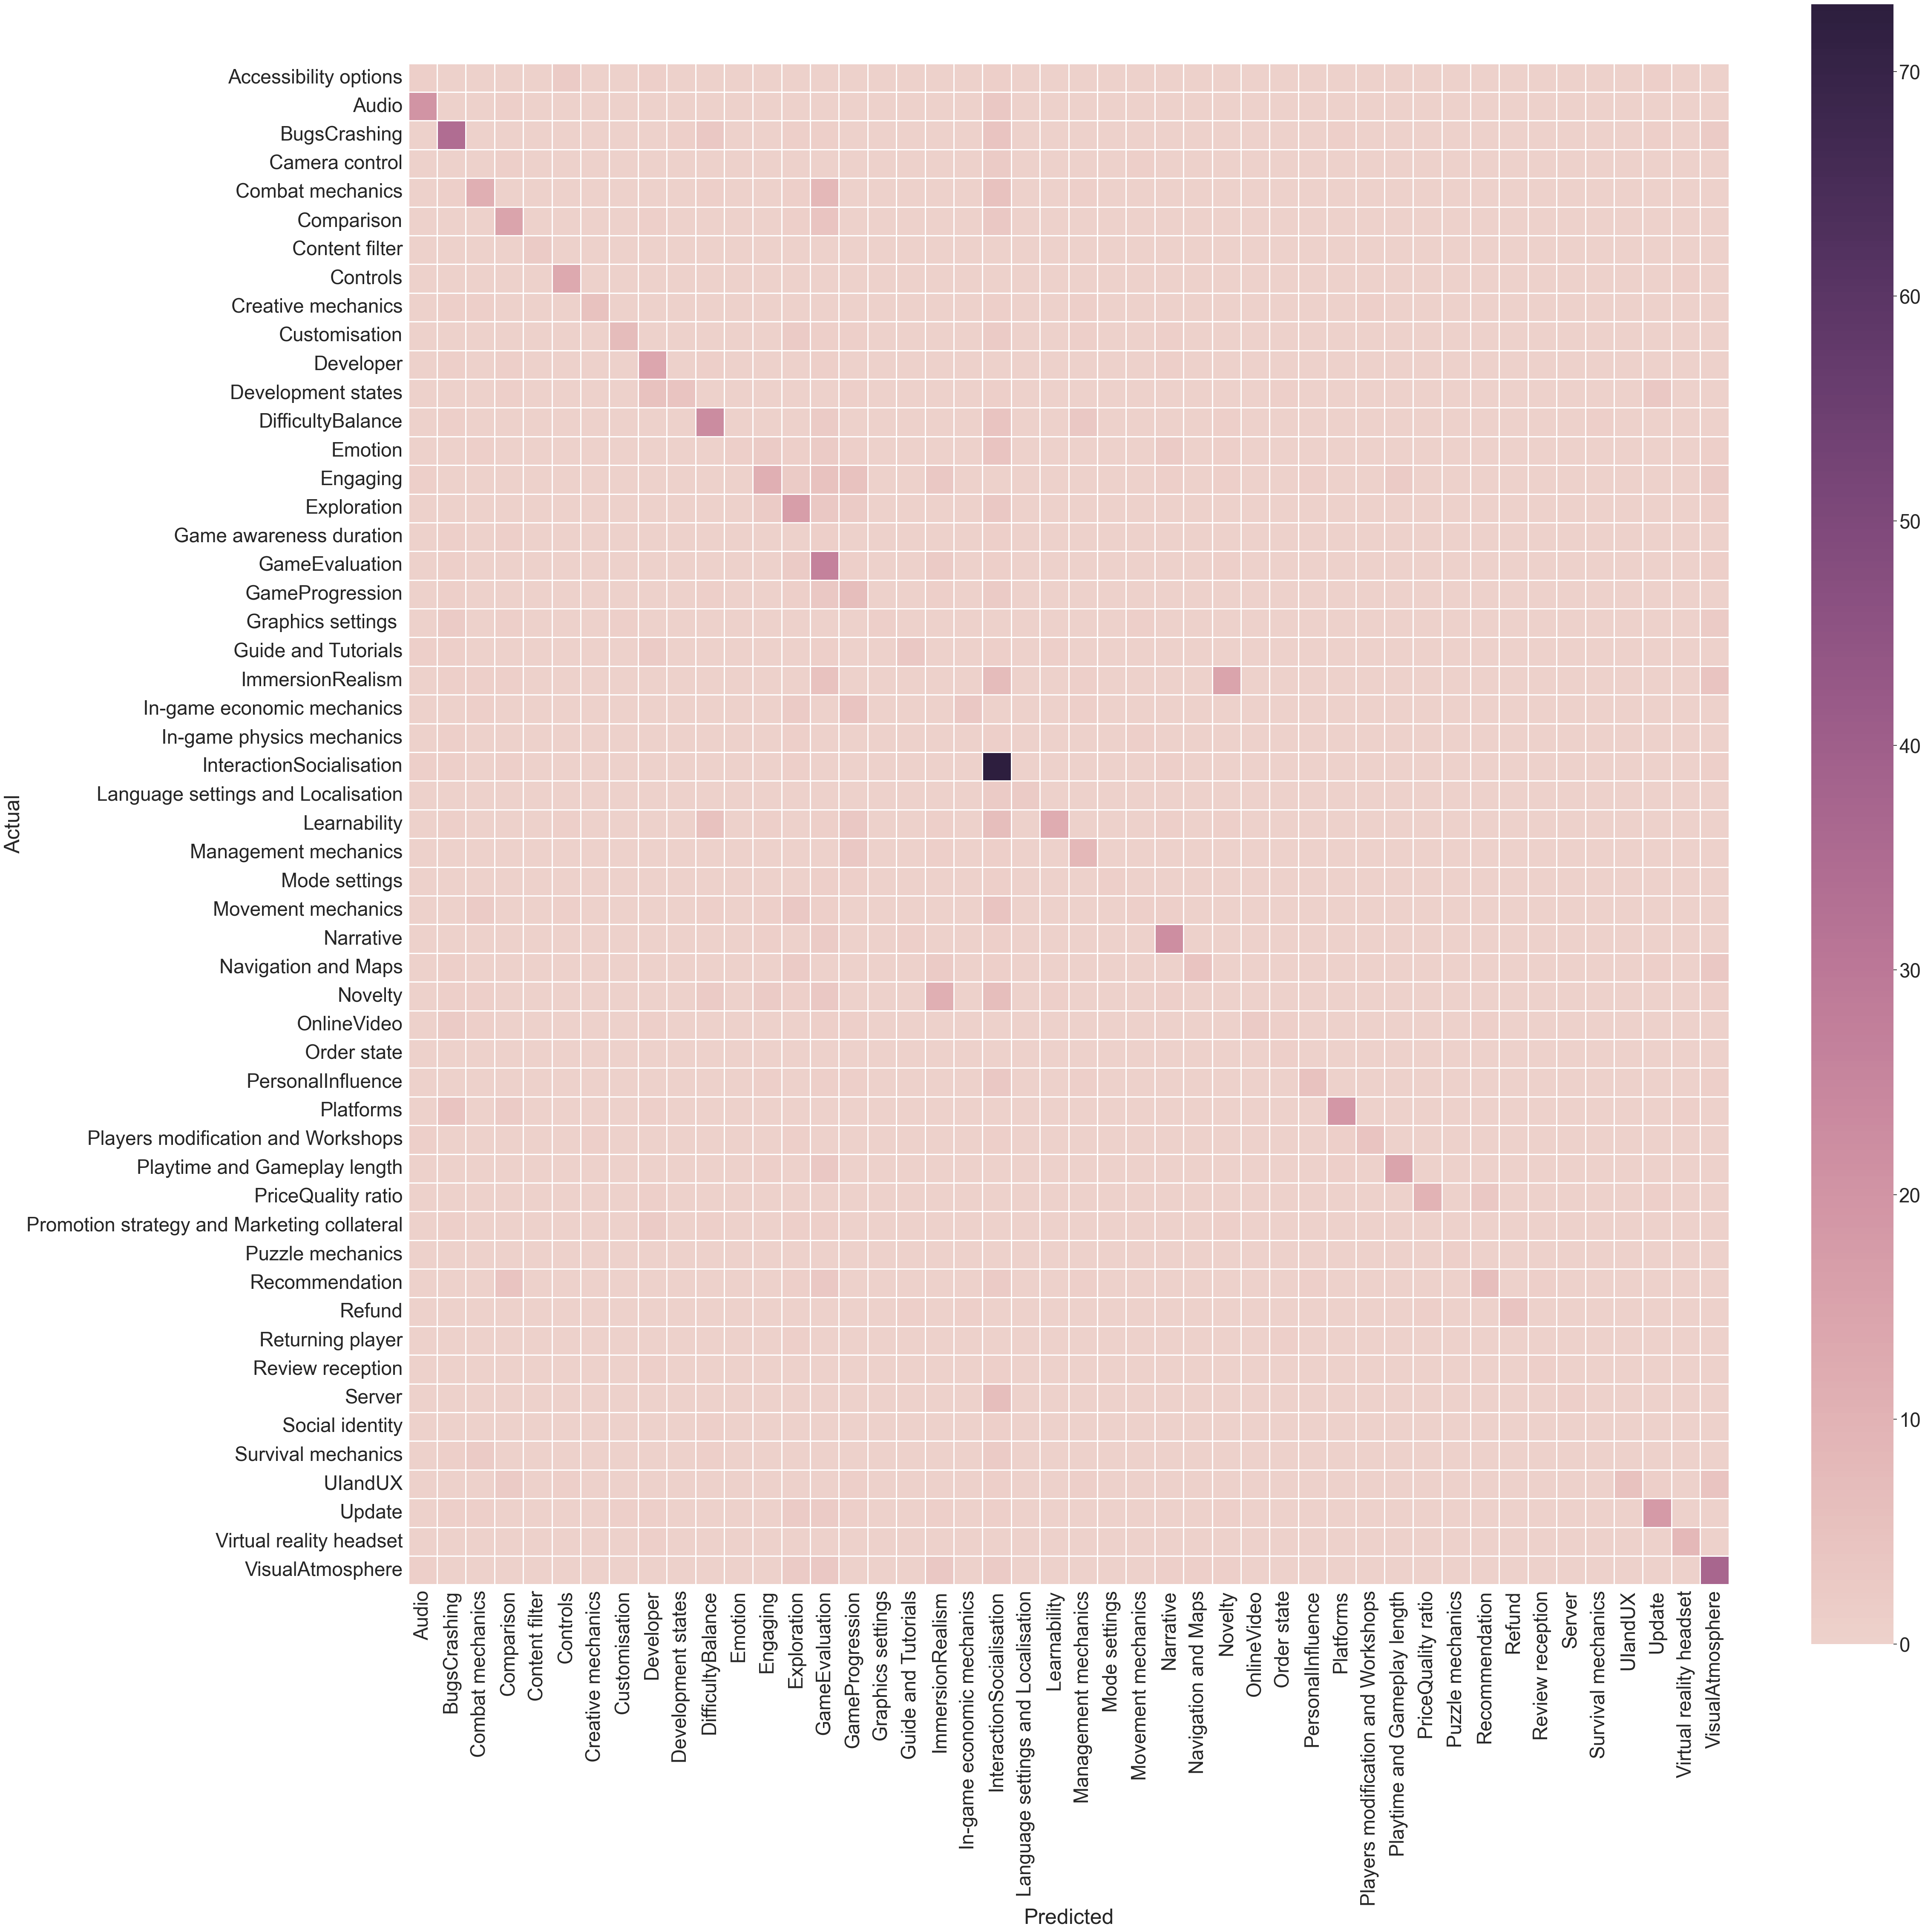

In [53]:
plt.figure(figsize = (50,50))
  
sn.set(font_scale=3) # for label size 
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap=sn.cubehelix_palette(as_cmap=True), fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()

In [54]:
# df_confusion.to_csv('./datasets/df_confusion.csv', index=False)

In [55]:
from sklearn.preprocessing import minmax_scale
df_confusion[:] = minmax_scale(df_confusion)

In [56]:
df_confusion

Predicted,Audio,BugsCrashing,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,Development states,...,Puzzle mechanics,Recommendation,Refund,Review reception,Server,Survival mechanics,UIandUX,Update,Virtual reality headset,VisualAtmosphere
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0.05,0.000000,0.000000,0.000000,0.0,0.153846,0.0,0.000000,0.071429,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556,0.000,0.000000
Audio,1.00,0.000000,0.000000,0.066667,0.0,0.000000,0.0,0.000000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
BugsCrashing,0.00,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.25,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556,0.000,0.054054
Camera control,0.00,0.000000,0.000000,0.066667,0.0,0.000000,0.0,0.000000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
Combat mechanics,0.00,0.029412,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
Comparison,0.00,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.071429,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
Content filter,0.00,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000
Controls,0.00,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.000000
Creative mechanics,0.00,0.029412,0.090909,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000


In [57]:
df_confusion.to_csv('../datasets/sBERTopic/1105results/test-df_confusion_normalsied53.csv',index=False)

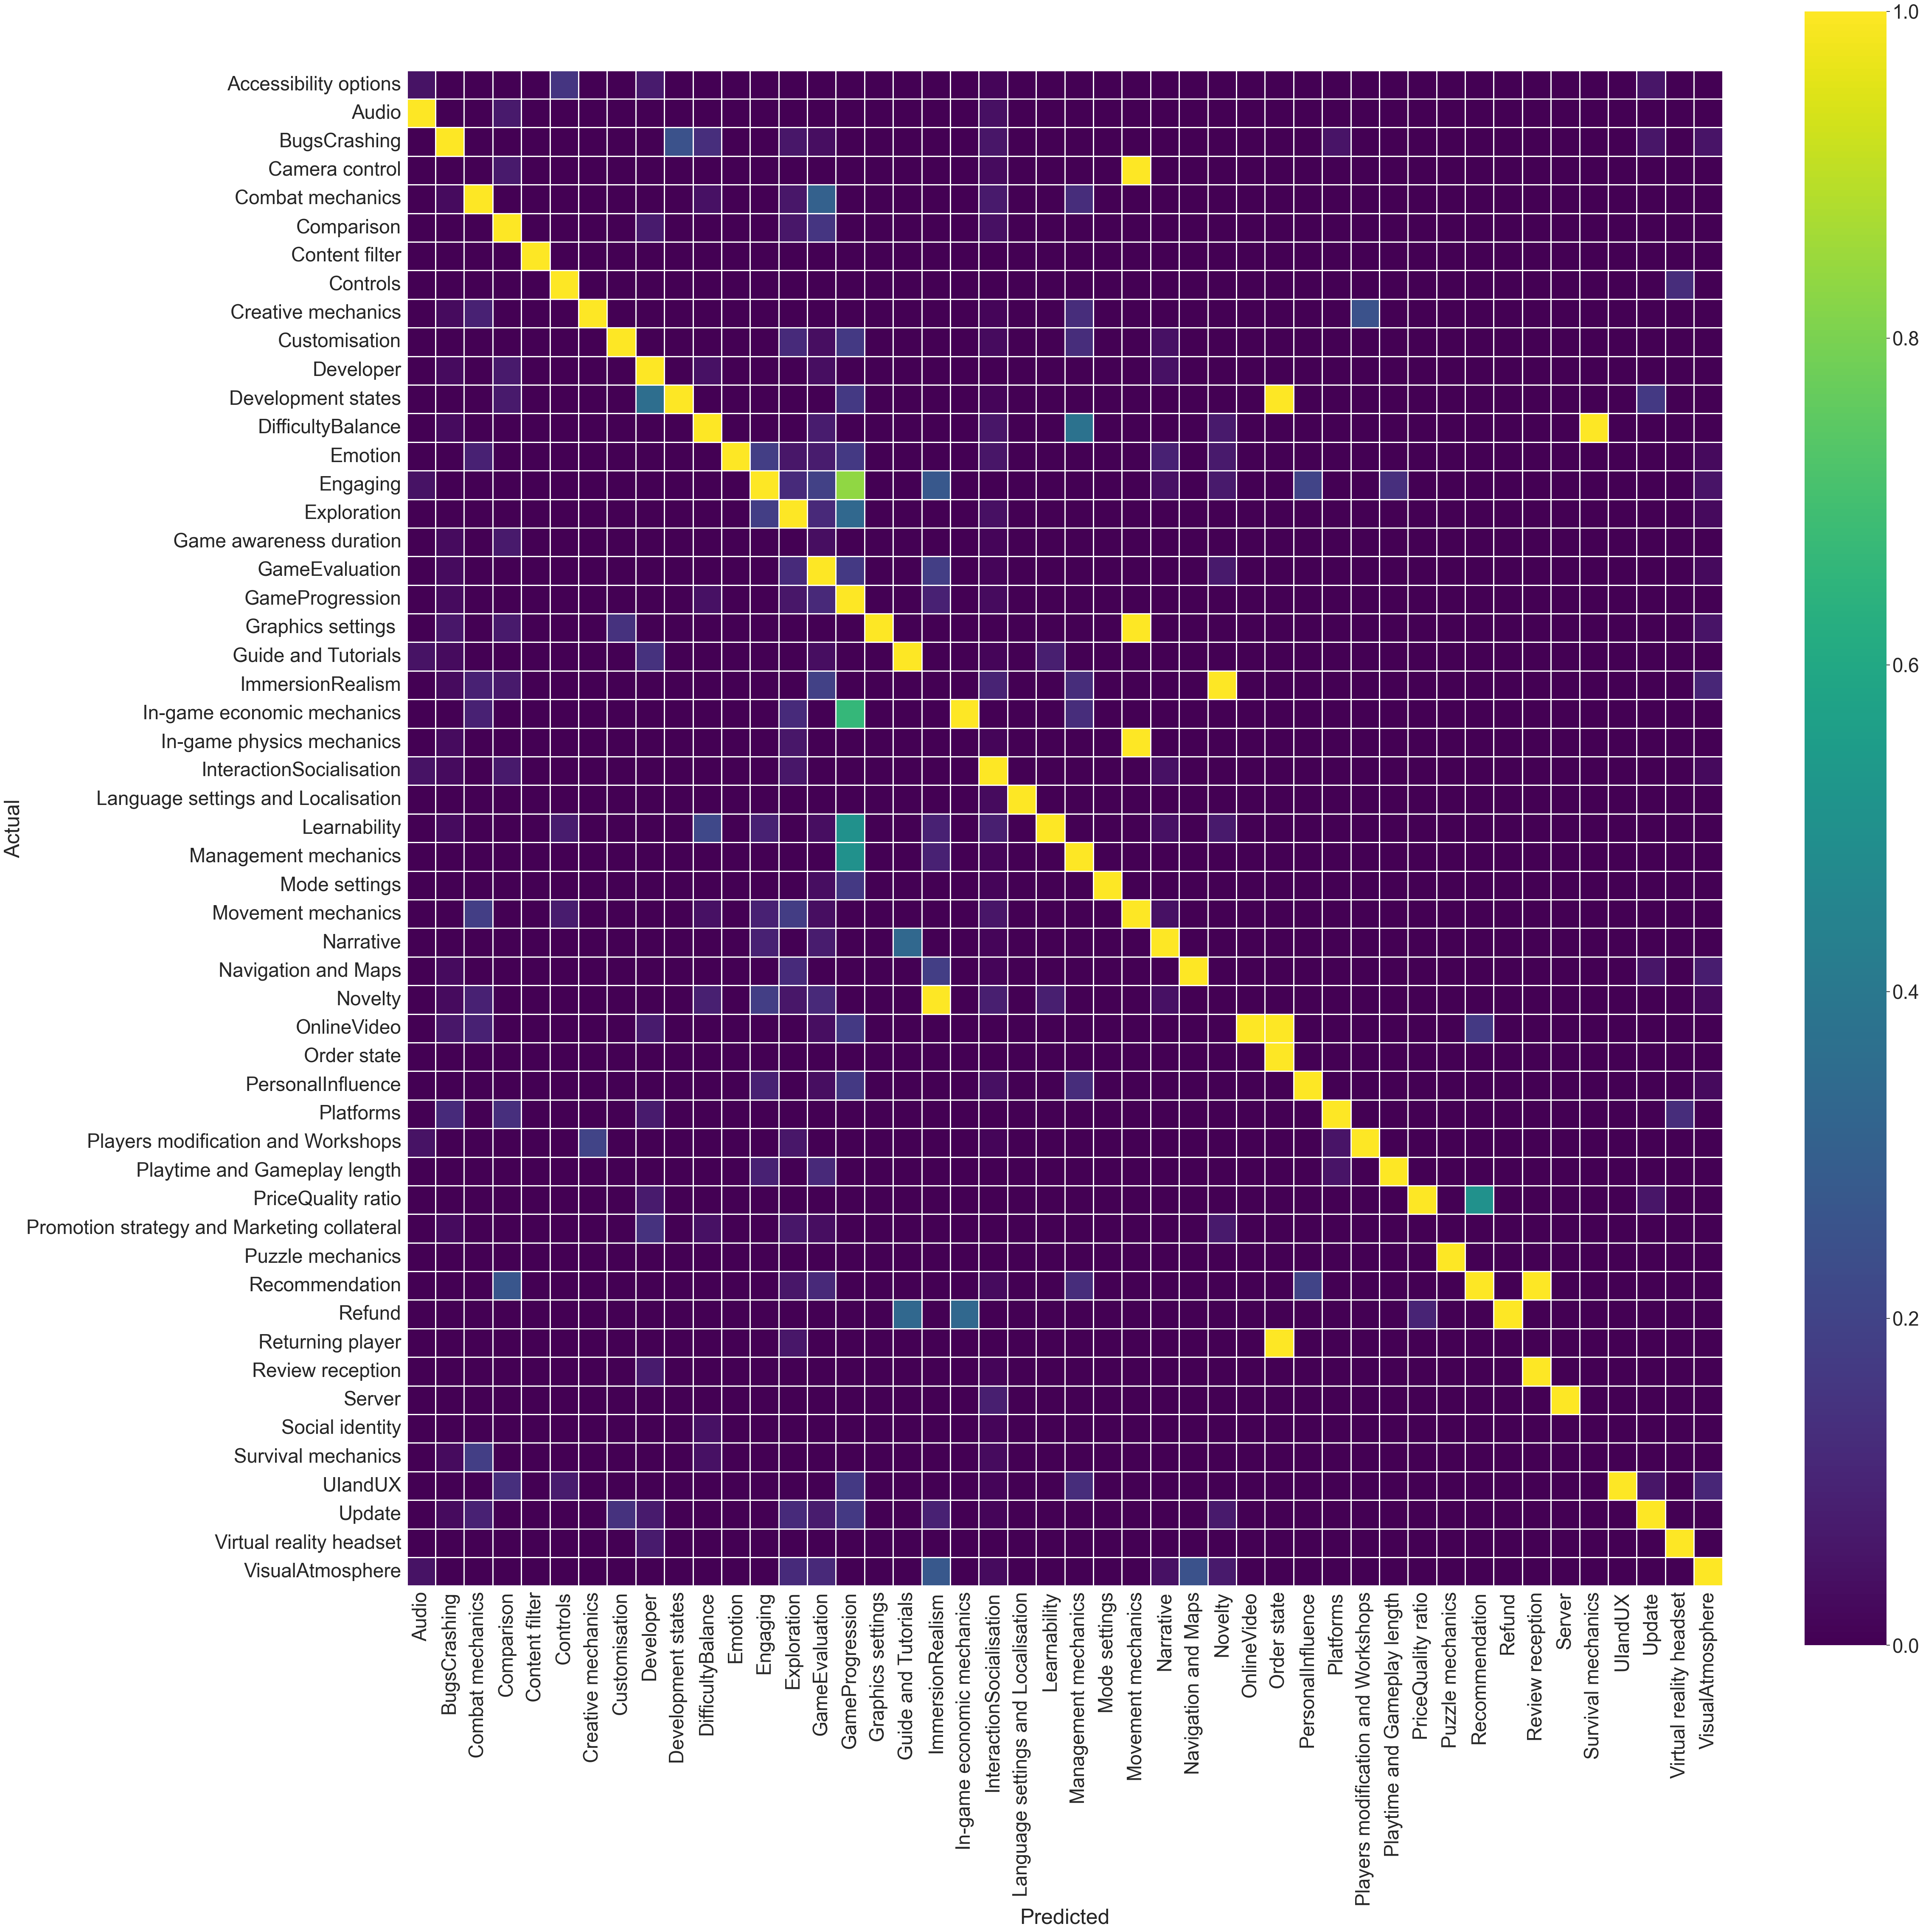

In [58]:
plt.figure(figsize = (50,50))
  
sn.set(font_scale=3) # for label size 
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap="viridis", fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()